In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load Dataset 
data_path = "/Users/cheryl/Downloads/Train (1).csv"
df = pd.read_csv(data_path)

In [11]:
# Data Preview and Cleaning
print(df.head())
print(df.info())

# Drop duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Rename target column to be consistent
df.rename(columns={"Reached.on.Time_Y.N": "Is Late"}, inplace=True)

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [12]:
# Encoding Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
# Feature and Target Split
X = df.drop('Is Late', axis=1)
y = df['Is Late']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6584848484848485
[[ 977  335]
 [ 792 1196]]
              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1312
           1       0.78      0.60      0.68      1988

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.69      0.66      0.66      3300



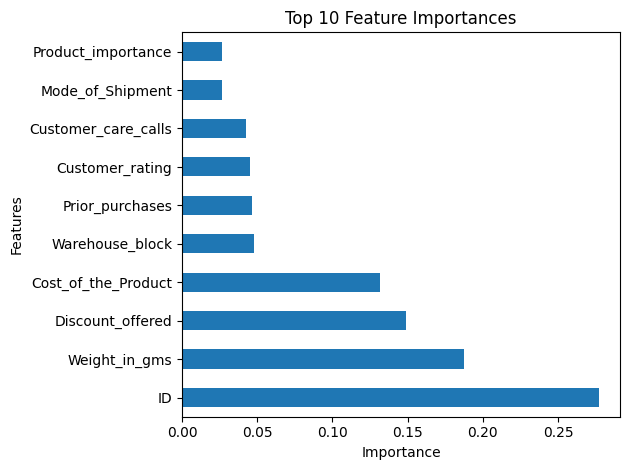

In [16]:
# Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [18]:
# 3D Visualization with Plotly
fig = px.scatter_3d(df, 
                    x='Customer_care_calls', 
                    y='Discount_offered', 
                    z='Weight_in_gms',
                    color='Is Late', symbol='Is Late',
                    title='3D Visualization of Call Volume, Discounts, Weight vs. Lateness',
                    labels={"Customer_care_calls": "Customer Care Calls",
                            "Discount_offered": "Discount Offered",
                            "Weight_in_gms": "Weight in Grams"})
fig.update_traces(marker=dict(size=5))
fig.show()

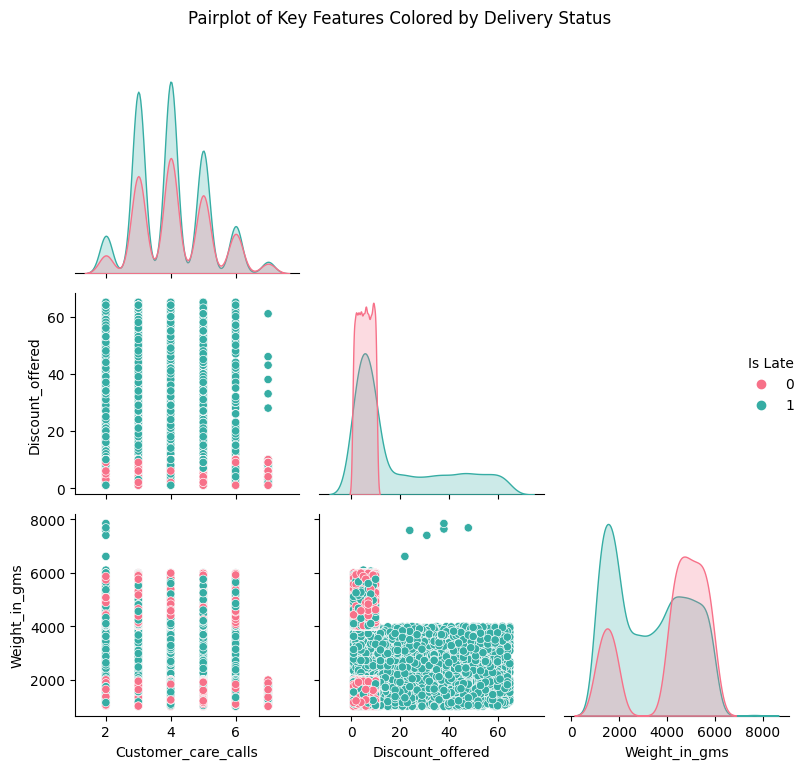

In [20]:
# D Visualization - Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[['Customer_care_calls', 'Discount_offered', 'Weight_in_gms', 'Is Late']],
    hue='Is Late',
    palette='husl',
    corner=True
)
plt.suptitle('Pairplot of Key Features Colored by Delivery Status', y=1.02)
plt.tight_layout()
plt.show()

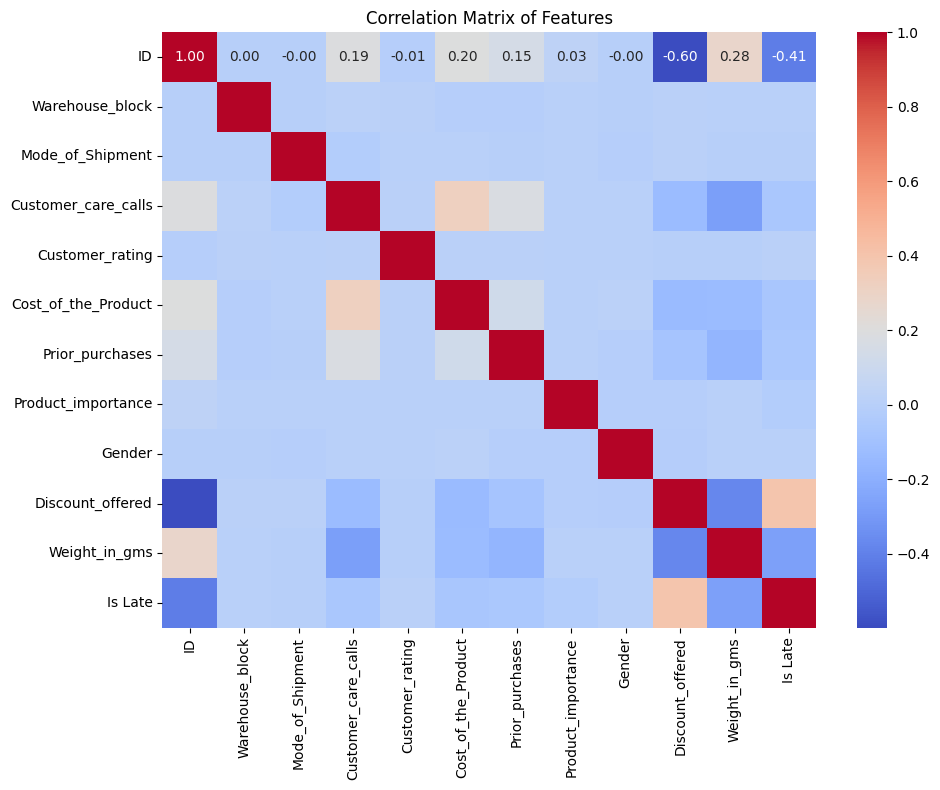

In [19]:
# Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()